# Penerapan data mining menentukan minta baca mahasiswa diperpustakan universitas peradaban menggunakan algoritma k-means clustering

## Persiapan Dataset

In [1]:
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, fill_mode='nearest')
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('flaskr/static/img/dataset', target_size = (256, 256), batch_size = 32, class_mode = 'categorical')
valid_generator = valid_datagen.flow_from_directory('flaskr/static/img/dataset', target_size = (256, 256), batch_size = 32, class_mode = 'categorical')

class_names = list(train_generator.class_indices.keys())
print(class_names)

Found 103 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
['antraknosa', 'culvularia_sp']


## Persiapan Model

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=train_generator.image_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(train_generator.image_shape[0], activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model

<Sequential name=sequential_1, built=True>

In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=50
    )

Epoch 1/50


d:\Project\2024\08-Agustus\cnnsawit\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6654 - loss: 3.2197 - val_accuracy: 0.2812 - val_loss: 4.4192
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.1429 - loss: 3.6434 - val_accuracy: 0.1429 - val_loss: 1.5904
Epoch 3/50


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3128 - loss: 1.1565 - val_accuracy: 0.7188 - val_loss: 0.6076
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6250 - loss: 0.6687 - val_accuracy: 0.8571 - val_loss: 0.5647
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7326 - loss: 0.6305 - val_accuracy: 0.7292 - val_loss: 0.5849
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6875 - loss: 0.6160 - val_accuracy: 0.7143 - val_loss: 0.6016
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7201 - loss: 0.5951 - val_accuracy: 0.7292 - val_loss: 0.5828
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7143 - loss: 0.6176 - val_accuracy: 0.7143 - val_loss: 0.6022
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7342 - loss: 0.5640 - val_accuracy: 0.7292 - val_loss: 0.5824
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7500 - loss: 0.5860 - val_accuracy: 0.7143 - val_loss: 0.5919
Epoch 11/50
3/3 ━━

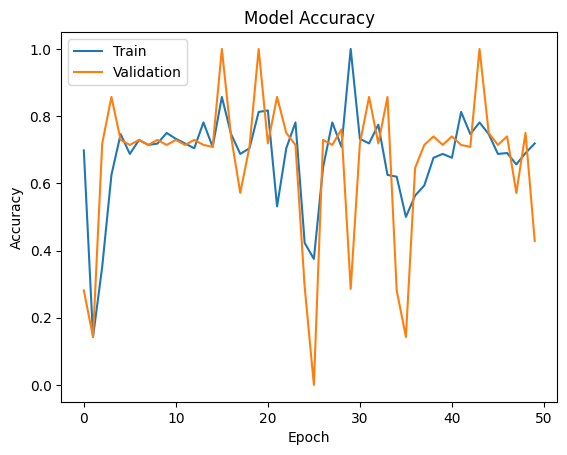

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

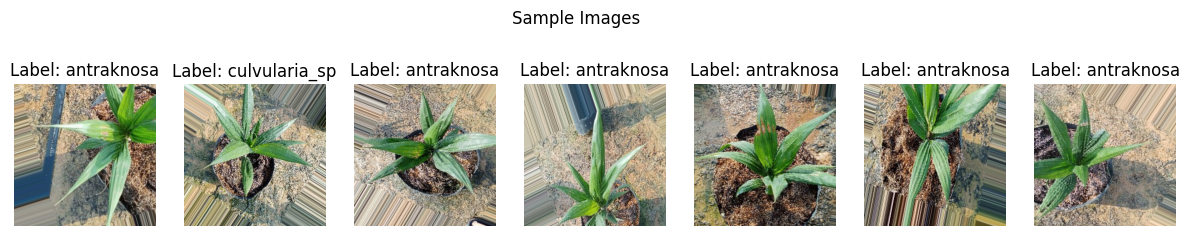

In [17]:
import numpy as np

for images, labels in train_generator:
    num_images = min(len(images), 9)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle('Sample Images')
    if num_images == 1:
        axs = [axs]

    for i in range(num_images):
        axs[i].imshow(images[i])
        axs[i].set_title('Label: ' + class_names[np.argmax(labels[i])])
        axs[i].axis('off')

    plt.show()
    break

In [24]:
scores = model.evaluate(valid_generator)
print(f'Akurasi: {scores[1]*100}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - accuracy: 0.7329 - loss: 0.5960
Akurasi: 72.81553149223328%


In [25]:
from tensorflow.keras.preprocessing import image 
import numpy as np

def predict_image(model, image_path, target_size=(256, 256)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class, predictions

In [29]:
new_image_path = 'flaskr/static/img/dataset/antraknosa/15.jpg'

predicted_class, predictions = predict_image(model, new_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [31]:
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f'Predicted Class: {predicted_class[0]}')
print(f'Predicted Label: {predicted_label}')
print(f'Predictions: {predictions[0]}')

Predicted Class: 0
Predicted Label: antraknosa
Predictions: [0.7482522 0.2517477]


In [60]:
import pathlib
desktop = pathlib.Path("flaskr/static/img/dataset")

images = list(filter(lambda item: item.is_file(), desktop.rglob("*.jpg")))
urls = {}

for image in images:
    name = image.as_posix().replace(desktop.as_posix() + "/", "")
    if name.split("/")[0] not in urls:
        urls[name.split("/")[0]] = [name]
    else:
        urls[name.split("/")[0]].append(name)
urls

{'antraknosa': ['antraknosa/1.jpg',
  'antraknosa/10.jpg',
  'antraknosa/11.jpg',
  'antraknosa/12.jpg',
  'antraknosa/13.jpg',
  'antraknosa/14.jpg',
  'antraknosa/15.jpg',
  'antraknosa/16.jpg',
  'antraknosa/17.jpg',
  'antraknosa/18.jpg',
  'antraknosa/19.jpg',
  'antraknosa/2.jpg',
  'antraknosa/20.jpg',
  'antraknosa/21.jpg',
  'antraknosa/22.jpg',
  'antraknosa/23.jpg',
  'antraknosa/24.jpg',
  'antraknosa/25.jpg',
  'antraknosa/26.jpg',
  'antraknosa/27.jpg',
  'antraknosa/28.jpg',
  'antraknosa/29.jpg',
  'antraknosa/3.jpg',
  'antraknosa/30.jpg',
  'antraknosa/31.jpg',
  'antraknosa/32.jpg',
  'antraknosa/33.jpg',
  'antraknosa/34.jpg',
  'antraknosa/35.jpg',
  'antraknosa/36.jpg',
  'antraknosa/37.jpg',
  'antraknosa/38.jpg',
  'antraknosa/39.jpg',
  'antraknosa/4.jpg',
  'antraknosa/40.jpg',
  'antraknosa/41.jpg',
  'antraknosa/42.jpg',
  'antraknosa/43.jpg',
  'antraknosa/44.jpg',
  'antraknosa/45.jpg',
  'antraknosa/46.jpg',
  'antraknosa/47.jpg',
  'antraknosa/48.jpg',
 